In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
assets = ['KOTAKBANK.NS', 'ASIANPAINT.NS', 'BAJAJFINSV.NS', 'PIDILITIND.NS', 'TCS.NS']

In [0]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
startDate = '2013-01-01'

today = datetime.today().strftime('%Y-%m-%d')
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = startDate, end = today)['Adj Close']

df

,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
Date,,,,,
2013-01-01,322.542389,387.468353,904.541321,214.458023,509.679993
2013-01-02,325.991364,382.991852,903.201843,218.479416,509.337372
2013-01-03,324.998871,385.159973,907.765930,215.688065,516.312561
2013-01-04,322.666443,385.624298,923.343506,219.283691,523.811584
2013-01-07,321.798004,384.954224,910.147217,216.019272,522.057800
...,...,...,...,...,...
2020-06-08,1336.750000,1634.250000,5440.950195,1492.300049,2071.750000
2020-06-09,1304.150024,1642.050049,5310.799805,1467.300049,2072.050049
2020-06-10,1332.250000,1635.949951,5223.000000,1454.750000,2108.750000


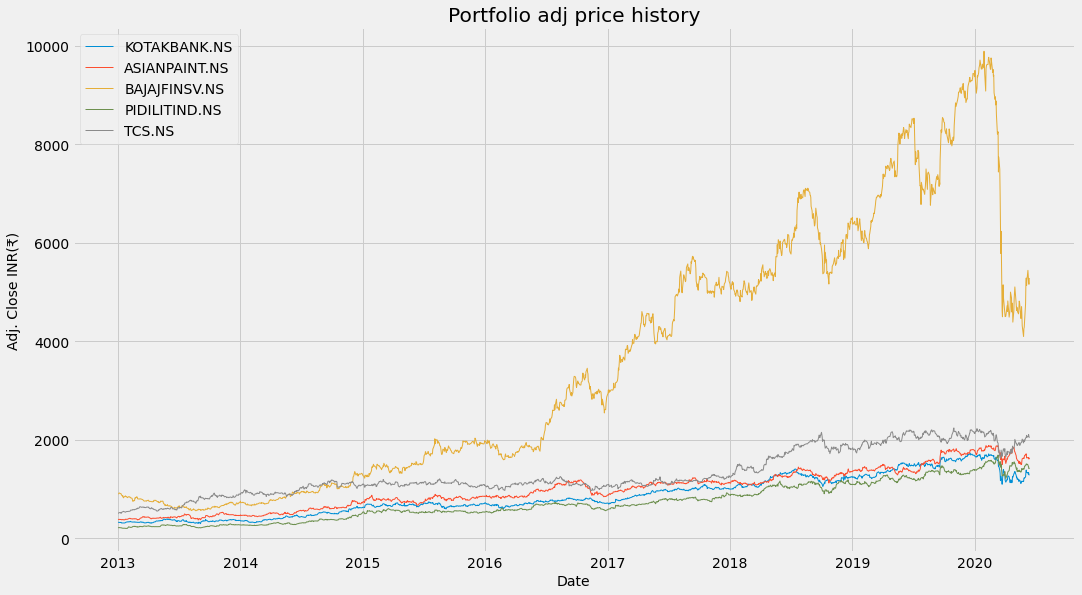

In [7]:
title = 'Portfolio adj price history'
my_stocks = df

# Visualization
plt.title(title)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Adj. Close INR(₹)', fontsize = 14)

plt.rcParams['lines.linewidth'] = 1
plt.rcParams["figure.figsize"] = (16,9)

#plot
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.legend(my_stocks.columns.values, loc = 'upper left')  
plt.show()

In [8]:
 # daily returns

 returns = df.pct_change()
 returns

,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
Date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.010693,-0.011553,-0.001481,0.018751,-0.000672
2013-01-03,-0.003045,0.005661,0.005053,-0.012776,0.013695
2013-01-04,-0.007177,0.001206,0.017160,0.016670,0.014524
2013-01-07,-0.002691,-0.001738,-0.014292,-0.014887,-0.003348
...,...,...,...,...,...
2020-06-08,-0.000785,-0.002624,0.039063,-0.010608,0.011473
2020-06-09,-0.024387,0.004773,-0.023921,-0.016753,0.000145
2020-06-10,0.021547,-0.003715,-0.016532,-0.008553,0.017712


In [9]:
# Create and show the annualized covariance matrix

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
KOTAKBANK.NS,0.078687,0.028308,0.035978,0.021775,0.013356
ASIANPAINT.NS,0.028308,0.071348,0.029231,0.031970,0.011242
BAJAJFINSV.NS,0.035978,0.029231,0.114231,0.028865,0.012359
PIDILITIND.NS,0.021775,0.031970,0.028865,0.071173,0.011786
TCS.NS,0.013356,0.011242,0.012359,0.011786,0.063687


In [10]:
# Calculate the portfolio variance

variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
variance

0.033954578242956654

In [11]:
# Volatility

volatility = np.sqrt(variance)
volatility

0.18426768095072085

In [12]:
#Calculate annual portfolio return

portfolio_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_annual_return

0.25702558162734024

In [14]:
# Show expected annual return

per_variance = str(round(variance, 2) * 100) + '%'
per_volatility = str(round(volatility, 2) * 100) + '%'
per_returns = str(round(portfolio_annual_return, 2) * 100) + '%'

print("Expected annual return: "+ per_returns)
print("Annual volatility/risk: "+ per_volatility)
print("Annual variance: "+ per_variance)

Expected annual return: 26.0%
Annual volatility/risk: 18.0%
Annual variance: 3.0%


In [15]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.9MB/s 


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
# portfolio optimization

# Calculate expected return and annualized co-variance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

ef.portfolio_performance(verbose = True)

OrderedDict([('KOTAKBANK.NS', 0.10841), ('ASIANPAINT.NS', 0.10241), ('BAJAJFINSV.NS', 0.15597), ('PIDILITIND.NS', 0.33508), ('TCS.NS', 0.29813)])
Expected annual return: 26.2%
Annual volatility: 18.1%
Sharpe Ratio: 1.34


(0.2619075465748254, 0.18091402457587674, 1.3371409272550205)

In [0]:
# Discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)

In [0]:
allocation , leftover = da.lp_portfolio()

In [25]:
print("Descrete allocation:", allocation)

Descrete allocation: {'KOTAKBANK.NS': 2.0, 'ASIANPAINT.NS': 1.0, 'BAJAJFINSV.NS': 1.0, 'PIDILITIND.NS': 3.0, 'TCS.NS': 3.0}


In [26]:
print("Fund remaining: ₹{:.2f}".format(leftover))

Fund remaining: ₹108.45
